<a href="https://colab.research.google.com/github/andersod55123456789/Dales_code_box/blob/main/GNN_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initializing Graph Learning Visualizer...
Generating Graph Learning Visualization...
Generating frame 1/30
Generating frame 2/30
Generating frame 3/30
Generating frame 4/30
Generating frame 5/30
Generating frame 6/30
Generating frame 7/30
Generating frame 8/30
Generating frame 9/30
Generating frame 10/30
Generating frame 11/30
Generating frame 12/30
Generating frame 13/30
Generating frame 14/30
Generating frame 15/30
Generating frame 16/30
Generating frame 17/30
Generating frame 18/30
Generating frame 19/30
Generating frame 20/30
Generating frame 21/30
Generating frame 22/30
Generating frame 23/30
Generating frame 24/30
Generating frame 25/30
Generating frame 26/30
Generating frame 27/30
Generating frame 28/30
Generating frame 29/30
Generating frame 30/30
Creating GIF...
GIF saved as graph_learning_animation.gif

✅ Graph learning animation saved to: graph_learning_animation.gif

The GIF shows:
- GNN learning to classify nodes into communities
- PageRank algorithm converging to find imp

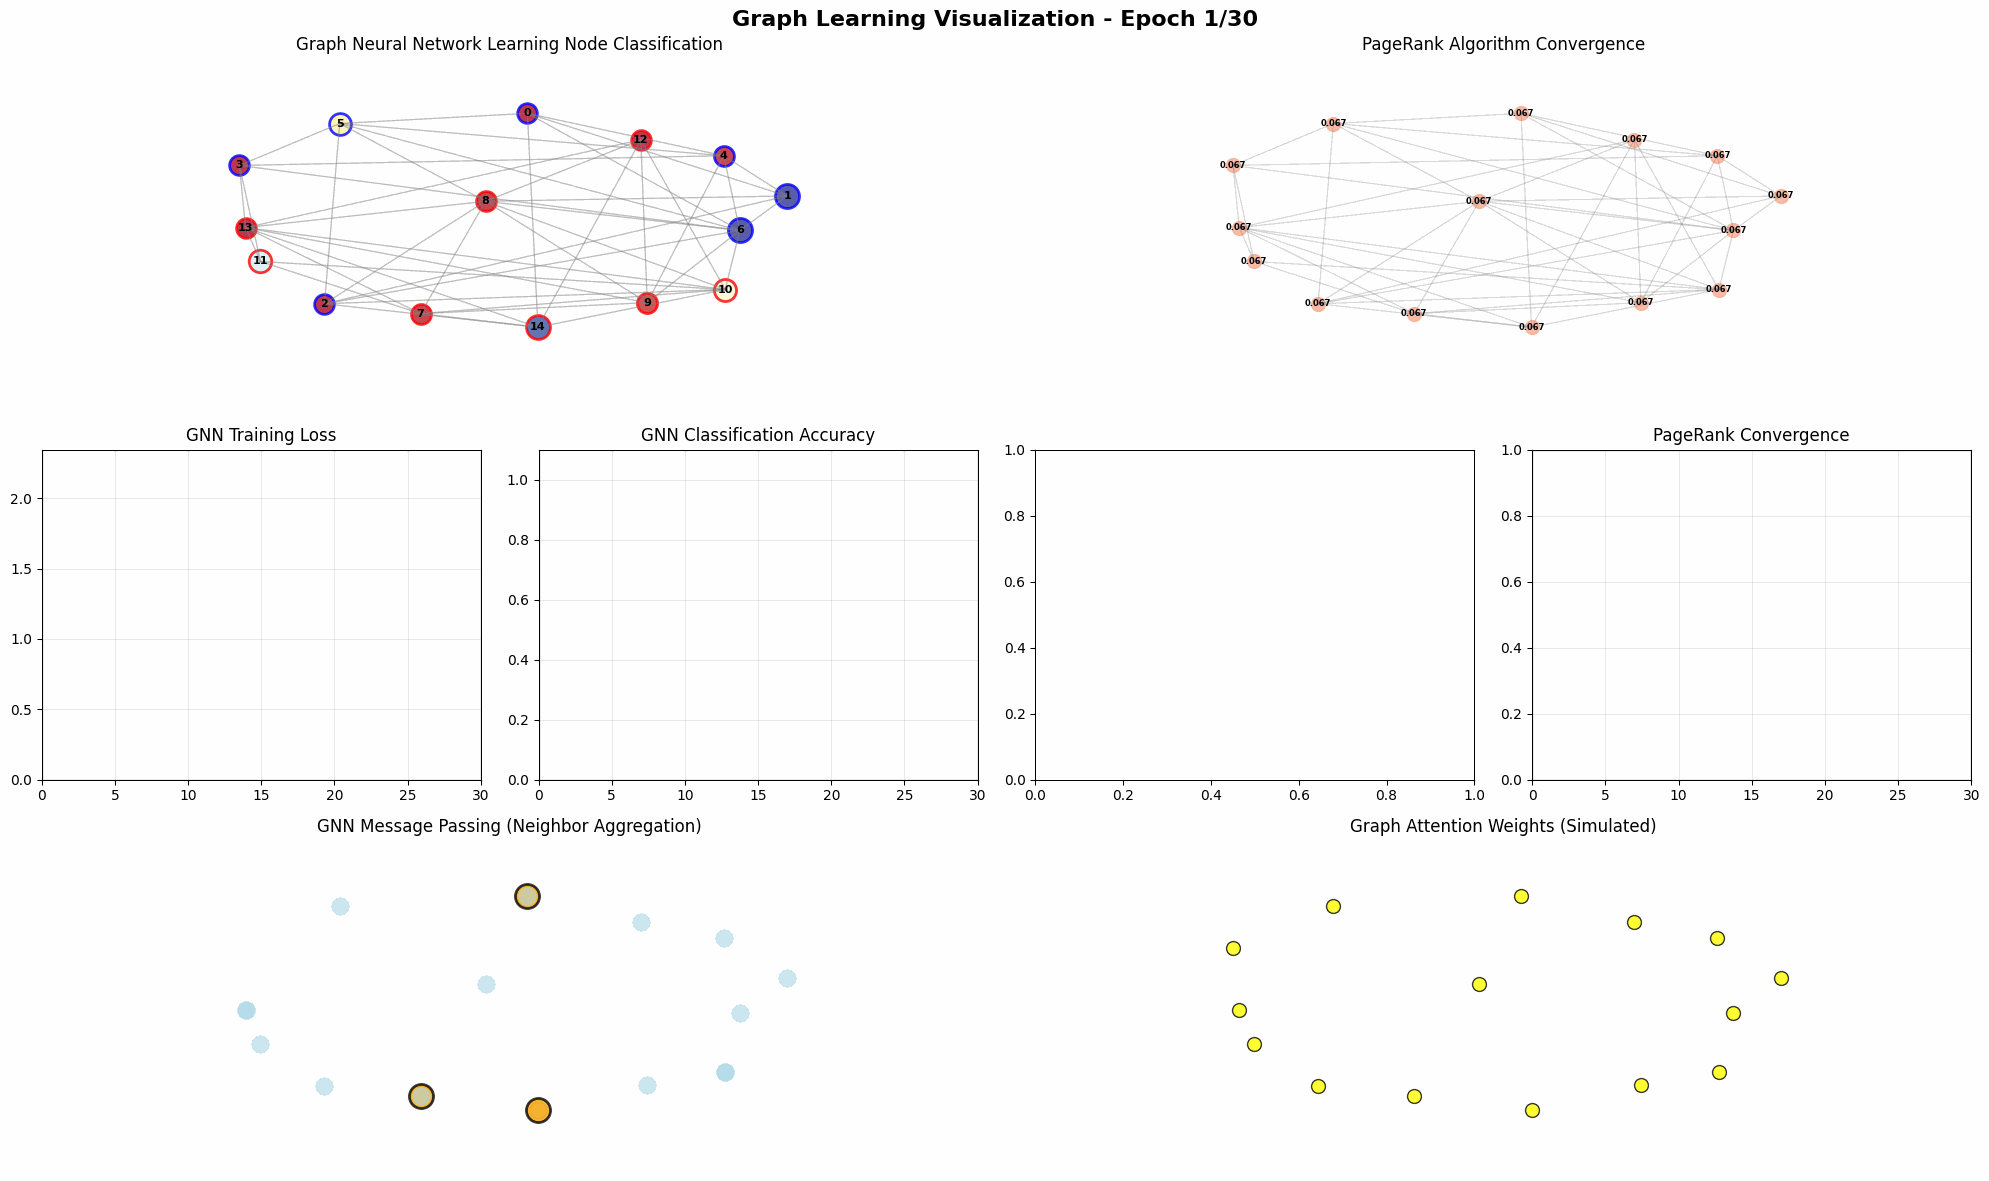

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import Circle, FancyArrowPatch
import networkx as nx
import imageio
import os
from scipy.spatial.distance import cdist
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')

class GraphLearningVisualizer:
    def __init__(self, num_epochs=40, num_nodes=20):
        self.num_epochs = num_epochs
        self.num_nodes = num_nodes
        self.setup_graph()
        self.setup_gnn_data()
        self.setup_pagerank_data()

    def setup_graph(self):
        """Create a graph structure with interesting topology"""
        # Create a graph with community structure
        np.random.seed(42)

        # Generate two communities
        community1_size = self.num_nodes // 2
        community2_size = self.num_nodes - community1_size

        # Create adjacency matrix
        self.adj_matrix = np.zeros((self.num_nodes, self.num_nodes))

        # Strong intra-community connections
        for i in range(community1_size):
            for j in range(i+1, community1_size):
                if np.random.random() < 0.7:  # High probability within community
                    self.adj_matrix[i, j] = 1
                    self.adj_matrix[j, i] = 1

        for i in range(community1_size, self.num_nodes):
            for j in range(i+1, self.num_nodes):
                if np.random.random() < 0.6:  # High probability within community
                    self.adj_matrix[i, j] = 1
                    self.adj_matrix[j, i] = 1

        # Weak inter-community connections
        for i in range(community1_size):
            for j in range(community1_size, self.num_nodes):
                if np.random.random() < 0.15:  # Low probability between communities
                    self.adj_matrix[i, j] = 1
                    self.adj_matrix[j, i] = 1

        # Create NetworkX graph for layout
        self.G = nx.from_numpy_array(self.adj_matrix)

        # Use spring layout for nice visualization
        self.pos = nx.spring_layout(self.G, k=3, iterations=50, seed=42)

        # True community labels
        self.true_labels = np.array([0] * community1_size + [1] * community2_size)

    def setup_gnn_data(self):
        """Simulate GNN learning process"""
        # Initialize random node features
        self.node_features_initial = np.random.randn(self.num_nodes, 8)

        # Simulate learning: features should cluster by community
        self.node_features_evolution = []
        self.predictions_evolution = []
        self.loss_evolution = []

        for epoch in range(self.num_epochs):
            progress = epoch / (self.num_epochs - 1)

            # Features gradually separate by community
            features = self.node_features_initial.copy()

            # Add learned community structure
            community_signal = np.zeros((self.num_nodes, 8))
            for i, label in enumerate(self.true_labels):
                if label == 0:
                    community_signal[i] = np.array([1, -1, 1, -1, 0, 0, 0, 0]) * progress
                else:
                    community_signal[i] = np.array([-1, 1, -1, 1, 0, 0, 0, 0]) * progress

            features += community_signal

            # Add message passing effect (smooth features between neighbors)
            if epoch > 0:
                smoothed_features = features.copy()
                for i in range(self.num_nodes):
                    neighbors = np.where(self.adj_matrix[i] > 0)[0]
                    if len(neighbors) > 0:
                        neighbor_features = features[neighbors]
                        smoothed_features[i] = 0.7 * features[i] + 0.3 * np.mean(neighbor_features, axis=0)
                features = smoothed_features

            self.node_features_evolution.append(features)

            # Generate predictions (softmax-like probabilities)
            # Project features to 2D for classification
            feature_sum = np.sum(features[:, :4], axis=1)
            predictions = 1 / (1 + np.exp(-feature_sum * 3))  # Sigmoid
            self.predictions_evolution.append(predictions)

            # Simulate loss (cross-entropy-like)
            pred_labels = (predictions > 0.5).astype(int)
            accuracy = np.mean(pred_labels == self.true_labels)
            loss = 2.0 * np.exp(-epoch / 10) + 0.1 + np.random.normal(0, 0.05)
            self.loss_evolution.append(max(loss, 0.05))

    def setup_pagerank_data(self):
        """Simulate PageRank convergence"""
        # Initialize PageRank values
        self.pagerank_evolution = []

        # Convert adjacency matrix to transition matrix
        degree = np.sum(self.adj_matrix, axis=1)
        transition_matrix = self.adj_matrix.copy()
        for i in range(self.num_nodes):
            if degree[i] > 0:
                transition_matrix[i] = transition_matrix[i] / degree[i]

        # PageRank parameters
        damping = 0.85

        # Initialize uniform distribution
        pagerank = np.ones(self.num_nodes) / self.num_nodes

        for iteration in range(self.num_epochs):
            self.pagerank_evolution.append(pagerank.copy())

            # PageRank update
            new_pagerank = (1 - damping) / self.num_nodes + damping * np.dot(transition_matrix.T, pagerank)
            pagerank = new_pagerank

    def create_frame(self, epoch):
        """Create a single frame showing both GNN learning and PageRank"""
        fig = plt.figure(figsize=(20, 12))

        # Create subplots
        gs = fig.add_gridspec(3, 4, height_ratios=[1, 1, 1], width_ratios=[1, 1, 1, 1])

        ax_gnn = fig.add_subplot(gs[0, :2])
        ax_pagerank = fig.add_subplot(gs[0, 2:])
        ax_loss = fig.add_subplot(gs[1, 0])
        ax_accuracy = fig.add_subplot(gs[1, 1])
        ax_features = fig.add_subplot(gs[1, 2])
        ax_pagerank_conv = fig.add_subplot(gs[1, 3])
        ax_message = fig.add_subplot(gs[2, :2])
        ax_attention = fig.add_subplot(gs[2, 2:])

        fig.suptitle(f'Graph Learning Visualization - Epoch {epoch+1}/{self.num_epochs}',
                    fontsize=16, fontweight='bold')

        # 1. GNN Graph Visualization
        ax_gnn.set_title('Graph Neural Network Learning Node Classification')

        # Draw edges
        for i, j in self.G.edges():
            x1, y1 = self.pos[i]
            x2, y2 = self.pos[j]
            ax_gnn.plot([x1, x2], [y1, y2], 'gray', alpha=0.5, linewidth=1)

        # Draw nodes colored by predicted probability
        predictions = self.predictions_evolution[epoch]
        for i, (node, (x, y)) in enumerate(self.pos.items()):
            pred = predictions[i]
            true_label = self.true_labels[i]

            # Color by prediction confidence
            color = plt.cm.RdYlBu(pred)
            size = 200 + 100 * pred  # Size based on confidence

            # Add border for true label
            border_color = 'red' if true_label == 1 else 'blue'
            ax_gnn.scatter(x, y, c=[color], s=size, alpha=0.8,
                          edgecolors=border_color, linewidth=2)

            # Add node ID
            ax_gnn.text(x, y, str(i), ha='center', va='center', fontsize=8, fontweight='bold')

        ax_gnn.set_xlim(-1.5, 1.5)
        ax_gnn.set_ylim(-1.5, 1.5)
        ax_gnn.axis('off')

        # 2. PageRank Visualization
        ax_pagerank.set_title('PageRank Algorithm Convergence')

        # Draw edges
        for i, j in self.G.edges():
            x1, y1 = self.pos[i]
            x2, y2 = self.pos[j]
            ax_pagerank.plot([x1, x2], [y1, y2], 'gray', alpha=0.3, linewidth=1)

        # Draw nodes sized by PageRank value
        pagerank_values = self.pagerank_evolution[epoch]
        max_pr = np.max(pagerank_values)
        min_pr = np.min(pagerank_values)

        for i, (node, (x, y)) in enumerate(self.pos.items()):
            pr_val = pagerank_values[i]
            normalized_pr = (pr_val - min_pr) / (max_pr - min_pr + 1e-8)

            size = 100 + 400 * normalized_pr
            color = plt.cm.Reds(0.3 + 0.7 * normalized_pr)

            ax_pagerank.scatter(x, y, c=[color], s=size, alpha=0.8)
            ax_pagerank.text(x, y, f'{pr_val:.3f}', ha='center', va='center',
                           fontsize=6, fontweight='bold')

        ax_pagerank.set_xlim(-1.5, 1.5)
        ax_pagerank.set_ylim(-1.5, 1.5)
        ax_pagerank.axis('off')

        # 3. Loss curve
        ax_loss.plot(range(epoch+1), self.loss_evolution[:epoch+1], 'r-', linewidth=2)
        ax_loss.set_title('GNN Training Loss')
        ax_loss.set_xlim(0, self.num_epochs)
        ax_loss.set_ylim(0, max(self.loss_evolution) * 1.1)
        ax_loss.grid(True, alpha=0.3)

        # 4. Classification accuracy
        accuracies = []
        for e in range(epoch+1):
            preds = (self.predictions_evolution[e] > 0.5).astype(int)
            acc = np.mean(preds == self.true_labels)
            accuracies.append(acc)

        ax_accuracy.plot(range(epoch+1), accuracies, 'g-', linewidth=2)
        ax_accuracy.set_title('GNN Classification Accuracy')
        ax_accuracy.set_xlim(0, self.num_epochs)
        ax_accuracy.set_ylim(0, 1.1)
        ax_accuracy.grid(True, alpha=0.3)

        # 5. Feature space evolution (t-SNE)
        if epoch > 0:
            features = self.node_features_evolution[epoch]
            if features.shape[1] > 2:
                try:
                    tsne = TSNE(n_components=2, random_state=42, perplexity=min(5, self.num_nodes-1))
                    features_2d = tsne.fit_transform(features)
                except:
                    # Fallback to PCA-like projection
                    features_2d = features[:, :2]
            else:
                features_2d = features

            colors = ['red' if label == 1 else 'blue' for label in self.true_labels]
            ax_features.scatter(features_2d[:, 0], features_2d[:, 1], c=colors, alpha=0.7)
            ax_features.set_title('Learned Feature Space')

        # 6. PageRank convergence
        if epoch > 0:
            pr_history = np.array(self.pagerank_evolution[:epoch+1])
            for i in range(min(5, self.num_nodes)):  # Show top 5 nodes
                ax_pagerank_conv.plot(range(epoch+1), pr_history[:, i],
                                    alpha=0.7, label=f'Node {i}')

        ax_pagerank_conv.set_title('PageRank Convergence')
        ax_pagerank_conv.set_xlim(0, self.num_epochs)
        ax_pagerank_conv.grid(True, alpha=0.3)
        if epoch > 10:
            ax_pagerank_conv.legend(fontsize=8)

        # 7. Message passing visualization
        ax_message.set_title('GNN Message Passing (Neighbor Aggregation)')

        # Show a few nodes and their message passing
        focus_nodes = [0, self.num_nodes//2, self.num_nodes-1]

        for focus_node in focus_nodes:
            if focus_node < len(self.pos):
                x, y = self.pos[focus_node]
                neighbors = np.where(self.adj_matrix[focus_node] > 0)[0]

                # Draw focus node
                ax_message.scatter(x, y, s=300, c='orange', alpha=0.8, edgecolors='black', linewidth=2)

                # Draw neighbors and message arrows
                for neighbor in neighbors:
                    nx, ny = self.pos[neighbor]
                    ax_message.scatter(nx, ny, s=150, c='lightblue', alpha=0.6)

                    # Draw message arrow with animation
                    progress = (epoch % 20) / 20.0
                    arrow_x = nx + progress * (x - nx)
                    arrow_y = ny + progress * (y - ny)

                    if progress > 0.1:
                        ax_message.annotate('', xy=(arrow_x, arrow_y), xytext=(nx, ny),
                                          arrowprops=dict(arrowstyle='->', color='red', lw=2))

        ax_message.set_xlim(-1.5, 1.5)
        ax_message.set_ylim(-1.5, 1.5)
        ax_message.axis('off')

        # 8. Attention weights visualization
        ax_attention.set_title('Graph Attention Weights (Simulated)')

        # Simulate attention weights based on feature similarity
        features = self.node_features_evolution[epoch]

        # Draw graph with edge thickness based on attention
        for i, j in self.G.edges():
            x1, y1 = self.pos[i]
            x2, y2 = self.pos[j]

            # Simulate attention as feature similarity
            similarity = np.exp(-np.linalg.norm(features[i] - features[j]) / 4)
            attention_weight = similarity * (epoch / self.num_epochs)

            ax_attention.plot([x1, x2], [y1, y2], 'purple',
                            alpha=attention_weight, linewidth=1 + 3*attention_weight)

        # Draw nodes
        for i, (node, (x, y)) in enumerate(self.pos.items()):
            ax_attention.scatter(x, y, s=100, c='yellow', alpha=0.8, edgecolors='black')

        ax_attention.set_xlim(-1.5, 1.5)
        ax_attention.set_ylim(-1.5, 1.5)
        ax_attention.axis('off')

        plt.tight_layout()

        # Save frame
        frame_path = f'temp_graph_frame_{epoch:03d}.png'
        plt.savefig(frame_path, dpi=100, bbox_inches='tight')
        plt.close()

        return frame_path

    def create_gif(self, output_path='graph_learning.gif', fps=3):
        """Generate the complete GIF"""
        print("Generating Graph Learning Visualization...")

        frame_paths = []

        # Generate all frames
        for epoch in range(self.num_epochs):
            print(f"Generating frame {epoch+1}/{self.num_epochs}")
            frame_path = self.create_frame(epoch)
            frame_paths.append(frame_path)

        # Create GIF from frames
        print("Creating GIF...")
        with imageio.get_writer(output_path, mode='I', fps=fps, loop=0) as writer:
            for frame_path in frame_paths:
                image = imageio.imread(frame_path)
                writer.append_data(image)

        # Clean up temporary files
        for frame_path in frame_paths:
            os.remove(frame_path)

        print(f"GIF saved as {output_path}")
        return output_path

# Usage - Perfect for Google Colab
if __name__ == "__main__":
    # Install required packages (uncomment if needed in Colab)
    # !pip install imageio matplotlib numpy networkx scikit-learn

    # Create visualizer
    print("Initializing Graph Learning Visualizer...")
    visualizer = GraphLearningVisualizer(num_epochs=30, num_nodes=15)  # Smaller for faster generation

    # Generate GIF
    gif_path = visualizer.create_gif('graph_learning_animation.gif', fps=4)

    print(f"\n✅ Graph learning animation saved to: {gif_path}")
    print("\nThe GIF shows:")
    print("- GNN learning to classify nodes into communities")
    print("- PageRank algorithm converging to find important nodes")
    print("- Message passing between connected nodes")
    print("- Feature space evolution as the network learns")
    print("- Attention weights adapting during training")
    print("- Loss curves and accuracy improvements")

    # Display the GIF in Colab
    from IPython.display import Image as IPImage, display
    print(f"\nDisplaying the generated GIF:")
    display(IPImage(gif_path))

    # Also provide download link
    from google.colab import files
    print("\nDownloading GIF to your local machine...")
    files.download(gif_path)